# Analyse Exploratoire des Données

## La consommation d'énergie

### Analyse de la forme

### Analyse du fond 

In [11]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns


In [12]:
data = pd.read_csv('../../raw_data/data_energy.csv',index_col="Date", parse_dates=True)

In [13]:
data.shape

(3417, 23)

In [14]:
data.columns

Index(['Code INSEE région', 'Consommation (MW)', 'Thermique (MW)',
       'Nucléaire (MW)', 'Eolien (MW)', 'Solaire (MW)', 'Hydraulique (MW)',
       'Pompage (MW)', 'Bioénergies (MW)', 'Ech. physiques (MW)',
       'Stockage batterie', 'Déstockage batterie', 'Eolien terrestre',
       'Eolien offshore', 'TCO Thermique (%)', 'TCH Thermique (%)',
       'TCO Nucléaire (%)', 'TCH Nucléaire (%)', 'TCO Eolien (%)',
       'TCH Eolien (%)', 'TCO Solaire (%)', 'TCH Solaire (%)', 'Column 30'],
      dtype='object')

In [15]:
data.isna().sum()

Code INSEE région      0
Consommation (MW)      0
Thermique (MW)         0
Nucléaire (MW)         0
Eolien (MW)            0
Solaire (MW)           0
Hydraulique (MW)       0
Pompage (MW)           0
Bioénergies (MW)       0
Ech. physiques (MW)    0
Stockage batterie      0
Déstockage batterie    0
Eolien terrestre       0
Eolien offshore        0
TCO Thermique (%)      0
TCH Thermique (%)      0
TCO Nucléaire (%)      0
TCH Nucléaire (%)      0
TCO Eolien (%)         0
TCH Eolien (%)         0
TCO Solaire (%)        0
TCH Solaire (%)        0
Column 30              0
dtype: int64

In [16]:
pd.set_option('display.max_column', 23)
data.head()

,Code INSEE région,Consommation (MW),Thermique (MW),Nucléaire (MW),Eolien (MW),Solaire (MW),Hydraulique (MW),Pompage (MW),Bioénergies (MW),Ech. physiques (MW),Stockage batterie,Déstockage batterie,Eolien terrestre,Eolien offshore,TCO Thermique (%),TCH Thermique (%),TCO Nucléaire (%),TCH Nucléaire (%),TCO Eolien (%),TCH Eolien (%),TCO Solaire (%),TCH Solaire (%),Column 30
Date,,,,,,,,,,,,,,,,,,,,,,,
2013-01-01,4464,252371.0,15175.0,0.0,372.0,405.0,61254.0,-4.0,1808.0,173268.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2013-01-02,4464,280064.0,18369.0,0.0,1404.0,2655.0,70681.0,-12.0,1717.0,185143.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2013-01-03,4464,285526.0,24755.0,0.0,626.0,2984.0,72282.0,0.0,2357.0,182412.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2013-01-04,4464,286799.0,17085.0,0.0,1028.0,2570.0,68995.0,0.0,2988.0,194018.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2013-01-05,4464,267848.0,15479.0,0.0,1557.0,2898.0,62143.0,0.0,3051.0,182618.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [17]:
addition = data['Thermique (MW)'] +  data['Eolien (MW)'] +  data['Solaire (MW)'] +  data['Hydraulique (MW)'] +  data['Pompage (MW)'] +  data['Bioénergies (MW)'] + data['Ech. physiques (MW)']
ecart = addition - data['Consommation (MW)']
print(ecart.min)
print(ecart.max)

<bound method NDFrame._add_numeric_operations.<locals>.min of Date
2013-01-01    -93.0
2013-01-02   -107.0
2013-01-03   -110.0
2013-01-04   -115.0
2013-01-05   -102.0
              ...  
2022-05-11      6.0
2022-05-12     16.0
2022-05-13     15.0
2022-05-14      5.0
2022-05-15     -2.0
Length: 3417, dtype: float64>
<bound method NDFrame._add_numeric_operations.<locals>.max of Date
2013-01-01    -93.0
2013-01-02   -107.0
2013-01-03   -110.0
2013-01-04   -115.0
2013-01-05   -102.0
              ...  
2022-05-11      6.0
2022-05-12     16.0
2022-05-13     15.0
2022-05-14      5.0
2022-05-15     -2.0
Length: 3417, dtype: float64>


In [18]:
data.loc[data["Nucléaire (MW)"]>0,:]

,Code INSEE région,Consommation (MW),Thermique (MW),Nucléaire (MW),Eolien (MW),Solaire (MW),Hydraulique (MW),Pompage (MW),Bioénergies (MW),Ech. physiques (MW),Stockage batterie,Déstockage batterie,Eolien terrestre,Eolien offshore,TCO Thermique (%),TCH Thermique (%),TCO Nucléaire (%),TCH Nucléaire (%),TCO Eolien (%),TCH Eolien (%),TCO Solaire (%),TCH Solaire (%),Column 30
Date,,,,,,,,,,,,,,,,,,,,,,,


In [19]:
nucleaire = data.loc[data["TCO Nucléaire (%)"]>0,:]
pd.set_option('display.max_column', 23)
nucleaire.head()

,Code INSEE région,Consommation (MW),Thermique (MW),Nucléaire (MW),Eolien (MW),Solaire (MW),Hydraulique (MW),Pompage (MW),Bioénergies (MW),Ech. physiques (MW),Stockage batterie,Déstockage batterie,Eolien terrestre,Eolien offshore,TCO Thermique (%),TCH Thermique (%),TCO Nucléaire (%),TCH Nucléaire (%),TCO Eolien (%),TCH Eolien (%),TCO Solaire (%),TCH Solaire (%),Column 30
Date,,,,,,,,,,,,,,,,,,,,,,,
2021-01-01,4464,283815.0,35036.0,0.0,996.0,1751.0,29305.0,-765.0,5335.0,212159.0,581.44,1057.51,0.0,0.0,16.68,1026.81,28.72,121.93,497.00,895.37,90.50,1766.60,0.0
2021-01-02,4464,294157.0,62666.0,0.0,2000.0,1364.0,30977.0,-153.0,5326.0,191984.0,998.76,1891.51,0.0,0.0,32.61,2061.87,20.76,95.00,505.68,946.48,87.54,1763.55,0.0
2021-01-03,4464,296424.0,30498.0,0.0,1962.0,3043.0,30438.0,-459.0,4957.0,225996.0,475.82,920.53,0.0,0.0,32.40,2022.71,47.10,211.90,492.34,929.97,80.75,1641.38,0.0
2021-01-04,4464,320426.0,82025.0,0.0,276.0,997.0,52963.0,0.0,5115.0,179054.0,1226.03,2475.83,0.0,0.0,4.33,284.56,13.94,69.43,777.35,1618.20,77.16,1693.68,0.0
2021-01-05,4464,327553.0,92019.0,0.0,423.0,3744.0,59492.0,-153.0,5204.0,166836.0,1350.14,2777.53,0.0,0.0,6.05,436.05,53.23,260.71,863.85,1817.68,76.62,1723.12,0.0


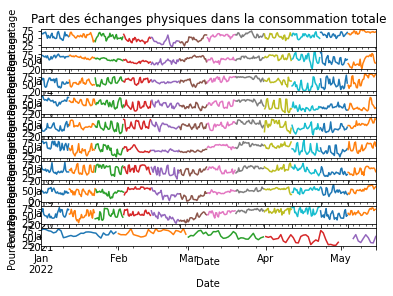

In [20]:
plt.rcParams["figure.figsize"]=[9,9]
plt.subplot(10, 1, 1)
plt.title("Part des échanges physiques dans la consommation totale")

Part_ech_phy =  (data['Ech. physiques (MW)'] / data['Consommation (MW)'])*100
Part_ech_phy['2013'].resample('M').plot(ylabel='Pourcentage')
plt.subplot(10, 1, 2)
Part_ech_phy['2014'].resample('M').plot(ylabel='Pourcentage')
plt.subplot(10, 1, 3)
Part_ech_phy['2015'].resample('M').plot(ylabel='Pourcentage')
plt.subplot(10, 1, 4)
Part_ech_phy['2016'].resample('M').plot(ylabel='Pourcentage')
plt.subplot(10, 1, 5)
Part_ech_phy['2017'].resample('M').plot(ylabel='Pourcentage')
plt.subplot(10, 1, 6)
Part_ech_phy['2018'].resample('M').plot(ylabel='Pourcentage')
plt.subplot(10, 1, 7)
Part_ech_phy['2019'].resample('M').plot( ylabel='Pourcentage')
plt.subplot(10, 1, 8)
Part_ech_phy['2020'].resample('M').plot( ylabel='Pourcentage')
plt.subplot(10, 1, 9)
Part_ech_phy['2021'].resample('M').plot(ylabel='Pourcentage')
plt.subplot(10, 1, 10)
Part_ech_phy['2022'].resample('M').plot(ylabel='Pourcentage')
plt.show()

In [21]:
df = pd.DataFrame(nucleaire[[ 'Thermique (MW)',
       'Nucléaire (MW)', 'Eolien (MW)', 'Solaire (MW)', 'Hydraulique (MW)',
       'Pompage (MW)', 'Bioénergies (MW)', 'Ech. physiques (MW)',
       'Stockage batterie', 'Déstockage batterie', 'Eolien terrestre',
       'Eolien offshore']])
print(df.sum(axis=1))

Date
2021-01-01    285455.95
2021-01-02    297054.27
2021-01-03    297831.35
2021-01-04    324131.86
2021-01-05    331692.67
                ...    
2022-02-24    258140.14
2022-02-25    258915.86
2022-02-26    251540.50
2022-02-27    256947.77
2022-02-28    269539.13
Length: 424, dtype: float64


In [22]:
df = pd.DataFrame(nucleaire[[ 'TCO Thermique (%)',
       'TCO Nucléaire (%)', 'TCO Eolien (%)', 'TCO Solaire (%)']])
#'TCO Thermique (%)', 'TCH Thermique (%)','TCO Nucléaire (%)', 'TCH Nucléaire (%)', 'TCO Eolien (%)','TCH Eolien (%)', 'TCO Solaire (%)', 'TCH Solaire (%)'
print(df.sum(axis=1))

Date
2021-01-01    632.90
2021-01-02    646.59
2021-01-03    652.59
2021-01-04    872.78
2021-01-05    999.75
               ...  
2022-02-24    873.14
2022-02-25    983.54
2022-02-26    935.75
2022-02-27    766.93
2022-02-28    819.49
Length: 424, dtype: float64


In [23]:
#data['Consommation (MW)']
#data.loc['2020-01-25' : '2020-02-05','Consommation (MW)']
data.loc['2020-02-25' : '2020-03-05','Consommation (MW)']
#data.loc['2020-03-25' : '2020-04-05','Consommation (MW)']
#data.loc['2020-04-25' : '2020-05-05','Consommation (MW)']
#data.loc['2020-05-25' : '2020-06-05','Consommation (MW)']

Date
2020-02-25    235439.0
2020-02-26    250677.0
2020-02-27    276847.0
2020-02-28    261791.0
2020-02-29    258027.0
2020-03-01    241786.0
2020-03-02    261953.0
2020-03-03    267935.0
2020-03-04    270715.0
2020-03-05    272830.0
Name: Consommation (MW), dtype: float64

In [24]:
data.loc['2021-01' : '2021-06','TCO Nucléaire (%)']

Date
2021-01-01     28.72
2021-01-02     20.76
2021-01-03     47.10
2021-01-04     13.94
2021-01-05     53.23
               ...  
2021-06-26    431.54
2021-06-27    381.75
2021-06-28    323.42
2021-06-29    377.39
2021-06-30    423.06
Name: TCO Nucléaire (%), Length: 181, dtype: float64

In [25]:
data.dropna().count()


Code INSEE région      3417
Consommation (MW)      3417
Thermique (MW)         3417
Nucléaire (MW)         3417
Eolien (MW)            3417
Solaire (MW)           3417
Hydraulique (MW)       3417
Pompage (MW)           3417
Bioénergies (MW)       3417
Ech. physiques (MW)    3417
Stockage batterie      3417
Déstockage batterie    3417
Eolien terrestre       3417
Eolien offshore        3417
TCO Thermique (%)      3417
TCH Thermique (%)      3417
TCO Nucléaire (%)      3417
TCH Nucléaire (%)      3417
TCO Eolien (%)         3417
TCH Eolien (%)         3417
TCO Solaire (%)        3417
TCH Solaire (%)        3417
Column 30              3417
dtype: int64

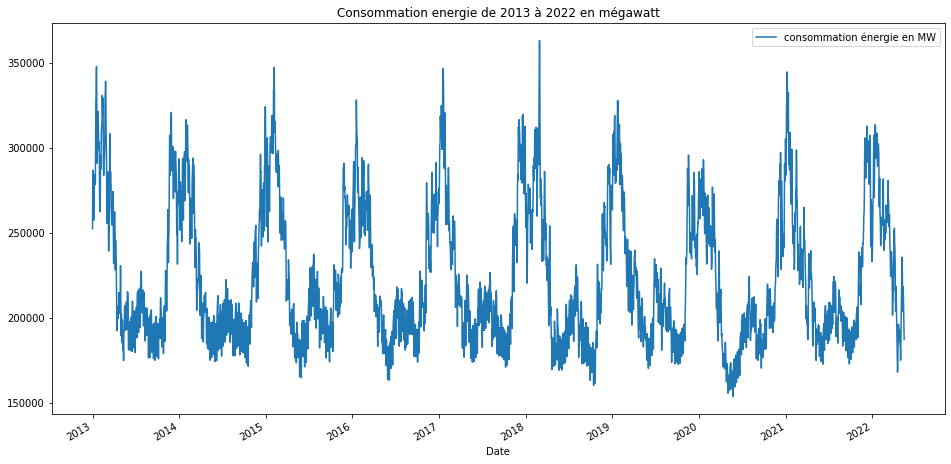

In [26]:
data['Consommation (MW)'].plot(figsize=(16,8), label='consommation énergie en MW', title='Consommation energie de 2013 à 2022 en mégawatt')
plt.legend()
plt.show()

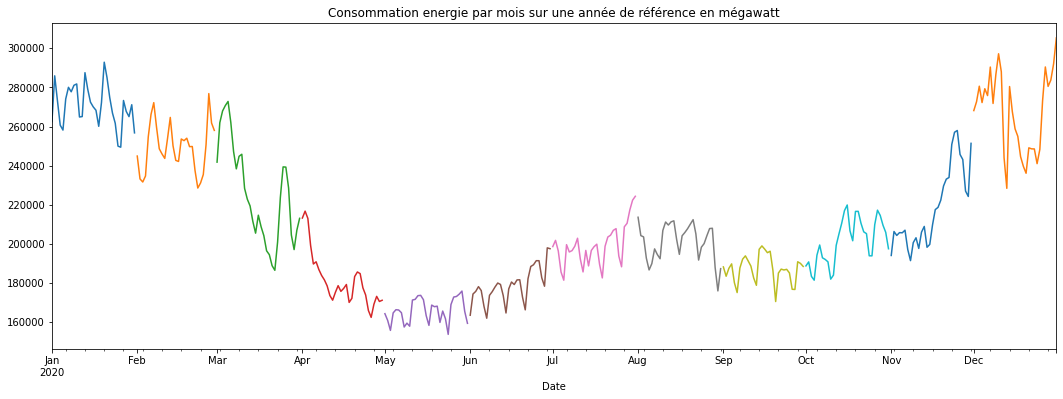

In [27]:
data['Consommation (MW)']['2020'].resample("M").plot(figsize=(18,6))
plt.title('Consommation energie par mois sur une année de référence en mégawatt')
#data.loc['2020-01' : '2020-02','Consommation (MW)'].resample("M").plot(figsize=(16,8))    #PLAGE DE REFERENCE
#data['Consommation (MW)']['2020'].hist(figsize=(18,6))                                    #HISTOGRAMME
plt.show()

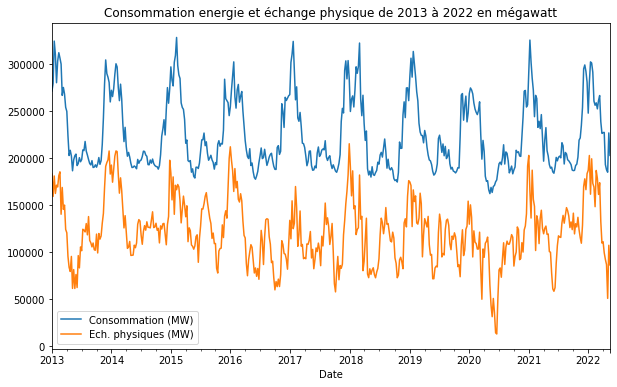

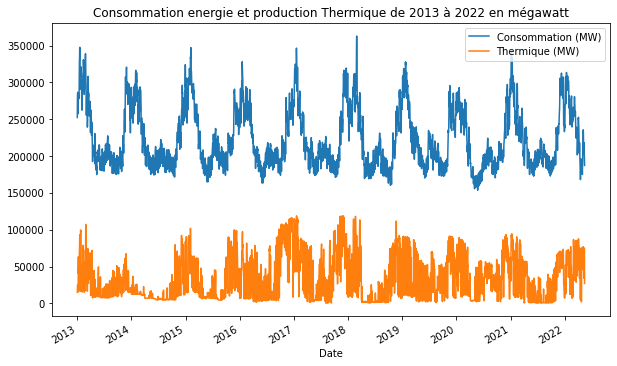

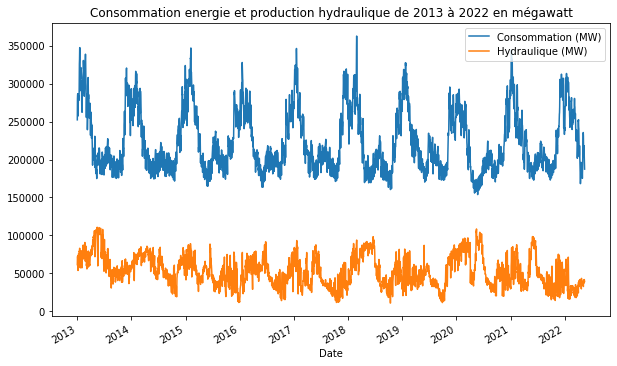

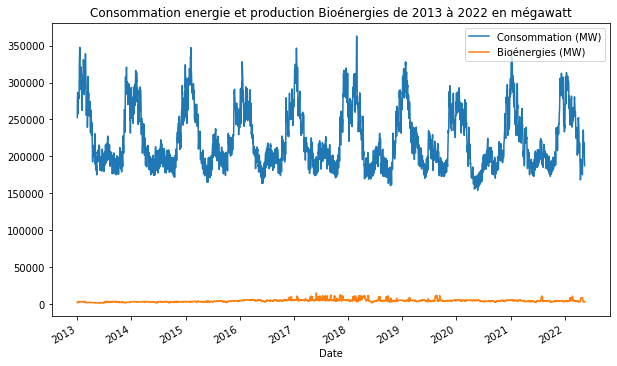

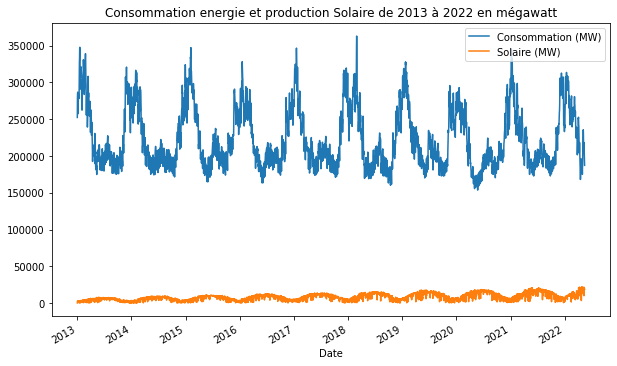

In [28]:
data[['Consommation (MW)','Ech. physiques (MW)']].resample('W').mean().plot(figsize=(10,6), title='Consommation energie et échange physique de 2013 à 2022 en mégawatt')
data[['Consommation (MW)','Thermique (MW)']].plot(figsize=(10,6), title='Consommation energie et production Thermique de 2013 à 2022 en mégawatt')
data[['Consommation (MW)', 'Hydraulique (MW)']].plot(figsize=(10,6), title='Consommation energie et production hydraulique de 2013 à 2022 en mégawatt')
data[['Consommation (MW)', 'Bioénergies (MW)']].plot(figsize=(10,6), title='Consommation energie et production Bioénergies de 2013 à 2022 en mégawatt')
data[['Consommation (MW)', 'Solaire (MW)']].plot(figsize=(10,6), title='Consommation energie et production Solaire de 2013 à 2022 en mégawatt')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

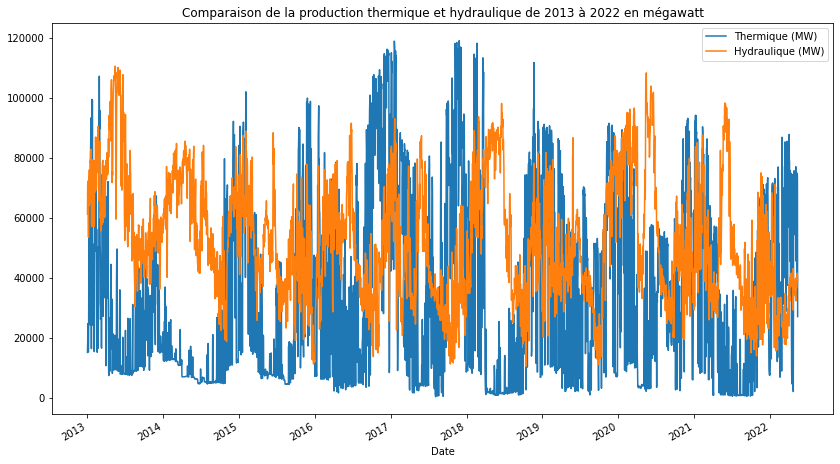

In [29]:
data[['Thermique (MW)','Hydraulique (MW)']].plot(figsize=(14,8), title='Comparaison de la production thermique et hydraulique de 2013 à 2022 en mégawatt')
plt.show

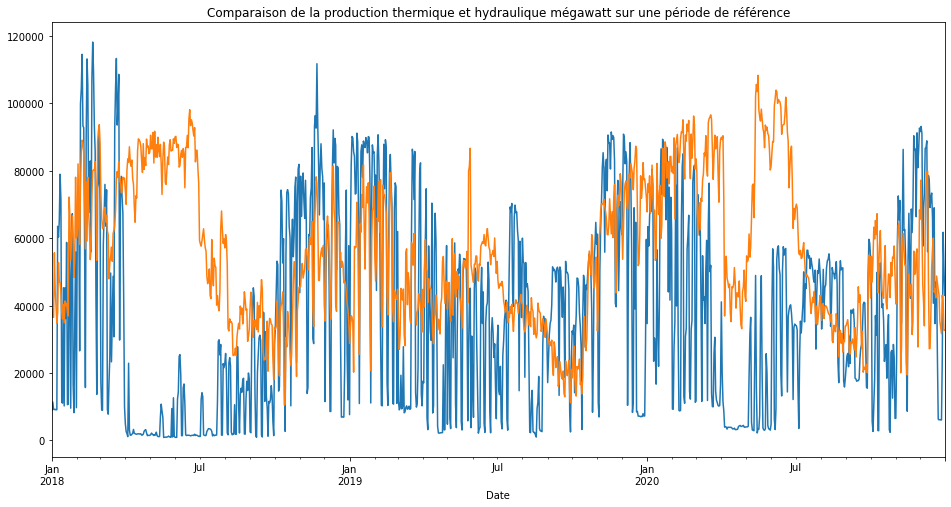

In [30]:
data.loc['2018' : '2020','Thermique (MW)'].plot(figsize=(16,8))
data.loc['2018' : '2020','Hydraulique (MW)'].plot(figsize=(16,8))

plt.title('Comparaison de la production thermique et hydraulique mégawatt sur une période de référence')
plt.show()

In [31]:
data[['Thermique (MW)','Hydraulique (MW)']].corr()

,Thermique (MW),Hydraulique (MW)
Thermique (MW),1.000000,-0.019403
Hydraulique (MW),-0.019403,1.000000


Représentations graphiques  des différentes productions d'énergie en %

<AxesSubplot:xlabel='Date'>

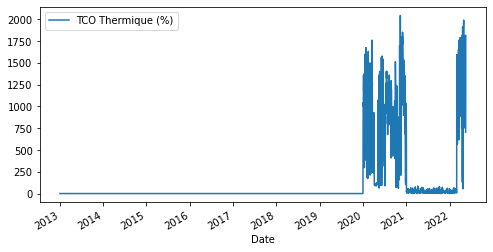

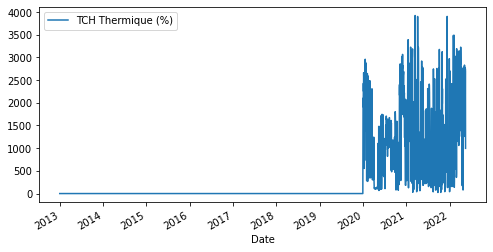

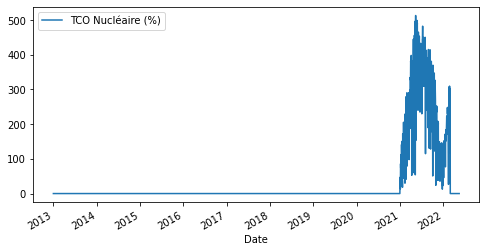

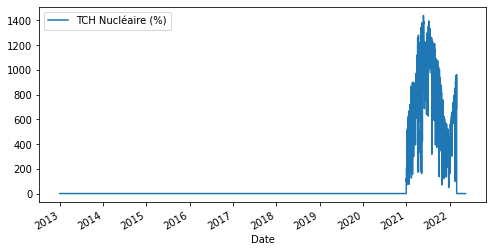

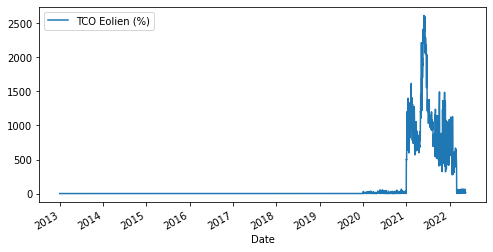

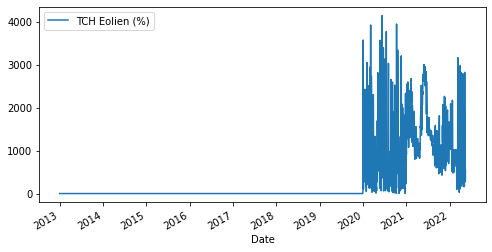

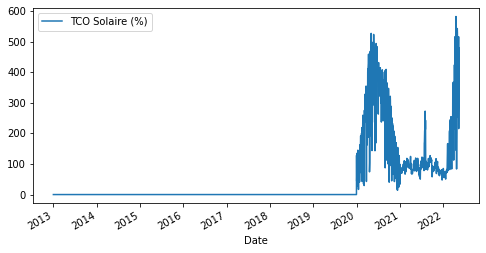

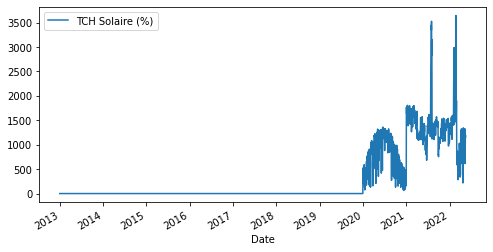

In [32]:
data[['TCO Thermique (%)']].plot(figsize=(8,4))
data[['TCH Thermique (%)']].plot(figsize=(8,4))
data[['TCO Nucléaire (%)']].plot(figsize=(8,4))
data[['TCH Nucléaire (%)']].plot(figsize=(8,4))
data[['TCO Eolien (%)']].plot(figsize=(8,4))
data[[ 'TCH Eolien (%)']].plot(figsize=(8,4))
data[['TCO Solaire (%)']].plot(figsize=(8,4))
data[['TCH Solaire (%)']].plot(figsize=(8,4))

In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3417 entries, 2013-01-01 to 2022-05-15
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Code INSEE région    3417 non-null   int64  
 1   Consommation (MW)    3417 non-null   float64
 2   Thermique (MW)       3417 non-null   float64
 3   Nucléaire (MW)       3417 non-null   float64
 4   Eolien (MW)          3417 non-null   float64
 5   Solaire (MW)         3417 non-null   float64
 6   Hydraulique (MW)     3417 non-null   float64
 7   Pompage (MW)         3417 non-null   float64
 8   Bioénergies (MW)     3417 non-null   float64
 9   Ech. physiques (MW)  3417 non-null   float64
 10  Stockage batterie    3417 non-null   float64
 11  Déstockage batterie  3417 non-null   float64
 12  Eolien terrestre     3417 non-null   float64
 13  Eolien offshore      3417 non-null   float64
 14  TCO Thermique (%)    3417 non-null   float64
 15  TCH Thermique (%)   

In [34]:
data[['Consommation (MW)', 'Thermique (MW)', 'Solaire (MW)', 'Hydraulique (MW)','Bioénergies (MW)', 'Ech. physiques (MW)']].describe()

,Consommation (MW),Thermique (MW),Solaire (MW),Hydraulique (MW),Bioénergies (MW),Ech. physiques (MW)
count,3417.000000,3417.000000,3417.000000,3417.000000,3417.000000,3417.000000
mean,224986.635353,36692.696517,8434.472929,53316.463272,4427.332163,121678.394791
std,39696.204708,30258.884003,4636.483295,20274.140384,1799.098889,39026.161467
min,153691.000000,435.000000,167.000000,10509.000000,1274.000000,-5578.000000
25%,194272.000000,8834.000000,4812.000000,37700.000000,3300.000000,95557.000000
50%,210106.000000,29805.000000,7912.000000,51324.000000,4241.000000,119559.000000
75%,254255.000000,59800.000000,11754.000000,67790.000000,5064.000000,143947.000000
max,362960.000000,119108.000000,22221.000000,110600.000000,14916.000000,249501.000000


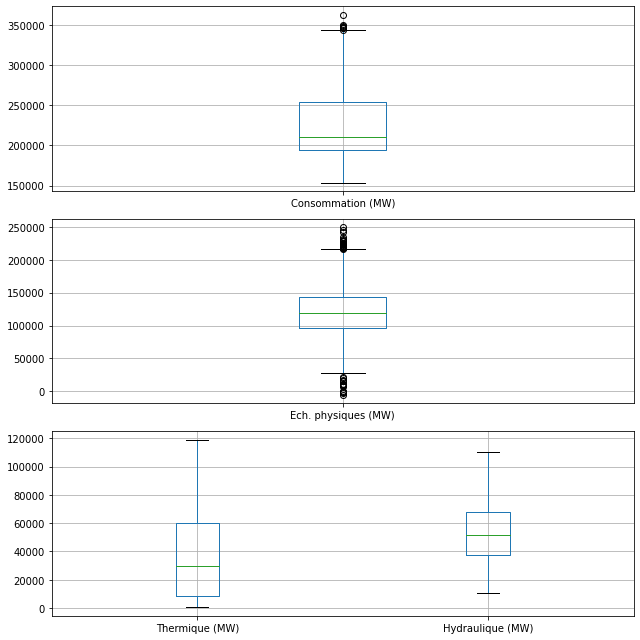

In [35]:
plt.rcParams["figure.figsize"]=[9,9]
plt.subplot(3, 1, 1)
data[['Consommation (MW)']].boxplot()
plt.subplot(3, 1, 2)
data[['Ech. physiques (MW)']].boxplot()
plt.subplot(3, 1, 3)
data[['Thermique (MW)', 'Hydraulique (MW)']].boxplot()
plt.tight_layout()

## Les prévisions météoroliques

### Analyse de la forme

### Analyse du fond 

In [36]:
df_weather_clean = pd.read_csv('../../raw_data/df_weather_clean.csv',index_col="Date", parse_dates=True)
df_weather_clean.head()

,Unnamed: 0,YEAR,MONTH,DAY,T2M,T2MDEW,T2MWET,TS,T2M_RANGE,T2M_MAX,T2M_MIN,QV2M,RH2M,PRECTOTCORR,PS,WS10M,WS50M,sin_month,cos_month,week_day,sin_day,cos_day
Date,,,,,,,,,,,,,,,,,,,,,,
2013-01-01,0,2013,1,1,7.30,6.40,6.85,7.08,5.75,9.60,3.86,6.16,94.12,5.62,97.76,3.23,5.29,0.5,0.866025,1,0.781831,0.623490
2013-01-02,1,2013,1,2,4.36,1.79,3.08,4.10,8.23,10.05,1.83,4.46,84.50,0.08,98.04,4.65,6.87,0.5,0.866025,2,0.974928,-0.222521
2013-01-03,2,2013,1,3,5.46,0.91,3.19,3.78,10.59,11.96,1.37,4.15,73.75,0.00,99.42,2.33,3.35,0.5,0.866025,3,0.433884,-0.900969
2013-01-04,3,2013,1,4,5.92,2.24,4.08,4.06,11.30,12.80,1.51,4.58,79.12,0.01,99.19,2.50,3.72,0.5,0.866025,4,-0.433884,-0.900969
2013-01-05,4,2013,1,5,6.64,2.37,4.50,4.85,12.38,14.41,2.04,4.76,74.88,0.00,98.51,3.25,5.05,0.5,0.866025,5,-0.974928,-0.222521


In [37]:
df_weather_clean.shape

(3449, 22)

In [38]:
df_weather_clean.columns

Index(['Unnamed: 0', 'YEAR', 'MONTH', 'DAY', 'T2M', 'T2MDEW', 'T2MWET', 'TS',
       'T2M_RANGE', 'T2M_MAX', 'T2M_MIN', 'QV2M', 'RH2M', 'PRECTOTCORR', 'PS',
       'WS10M', 'WS50M', 'sin_month', 'cos_month', 'week_day', 'sin_day',
       'cos_day'],
      dtype='object')

Définition des titres des colonnes:

In [39]:
df_weather_clean.isna().sum()

Unnamed: 0     0
YEAR           0
MONTH          0
DAY            0
T2M            0
T2MDEW         0
T2MWET         0
TS             0
T2M_RANGE      0
T2M_MAX        0
T2M_MIN        0
QV2M           0
RH2M           0
PRECTOTCORR    0
PS             0
WS10M          0
WS50M          0
sin_month      0
cos_month      0
week_day       0
sin_day        0
cos_day        0
dtype: int64

In [40]:
df_weather_clean[['T2M','TS']].plot(df_weather_clean['T2M'])
plt.show()

KeyError: "None of [Float64Index([  7.3,  4.36,  5.46,  5.92,  6.64, 10.74,  8.48,   6.3,   6.4,\n               5.57,\n              ...\n              24.06, 23.67, 24.68, 24.27, 23.79, 22.98, 20.11, 19.28, 21.96,\n              24.53],\n             dtype='float64', length=3449)] are in the [columns]"

In [ ]:
df_weather_clean[['T2M','TS']].head()

In [ ]:
df_weather_clean[['T2M', 'T2MDEW', 'T2MWET', 'TS',
       'T2M_RANGE', 'T2M_MAX', 'T2M_MIN']].corr()

In [ ]:
sns.heatmap(df_weather_clean[['T2M', 'T2MDEW', 'T2MWET', 'TS',
       'T2M_RANGE', 'T2M_MAX', 'T2M_MIN']].corr())


In [ ]:
sns.heatmap(df_weather_clean[['RH2M', 'PRECTOTCORR', 'PS','WS10M', 'WS50M']].corr())

In [ ]:
sns.set_style("whitegrid")
df_weather_clean = np.random.normal(size=(20, 6)) + np.arange(6) / 2
sns.boxplot(data=df_weather_clean);

## Etude la consommation selon la météo

### Analyse de la forme

### Analyse du fond 

In [78]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [79]:
df_energy_weather = pd.read_csv('../../raw_data/df_energy_weather.csv',index_col="Date", parse_dates=True)
pd.set_option('display.max_column', 55)


In [80]:
df_energy_weather.head()

,Unnamed: 0,Code INSEE région,Consommation (MW),Thermique (MW),Nucléaire (MW),Eolien (MW),Solaire (MW),Hydraulique (MW),Pompage (MW),Bioénergies (MW),Ech. physiques (MW),Stockage batterie,Déstockage batterie,Eolien terrestre,Eolien offshore,TCO Thermique (%),TCH Thermique (%),TCO Nucléaire (%),TCH Nucléaire (%),TCO Eolien (%),TCH Eolien (%),TCO Solaire (%),TCH Solaire (%),Column 30,YEAR,MONTH,DAY,T2M,T2MDEW,T2MWET,TS,T2M_RANGE,T2M_MAX,T2M_MIN,QV2M,RH2M,PRECTOTCORR,PS,WS10M,WS50M,sin_month,cos_month,week_day,sin_day,cos_day
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2013-01-01,0,4464,252371.0,15175.0,0.0,372.0,405.0,61254.0,-4.0,1808.0,173268.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2013,1,1,7.30,6.40,6.85,7.08,5.75,9.60,3.86,6.16,94.12,5.62,97.76,3.23,5.29,0.5,0.866025,1,0.781831,0.623490
2013-01-02,1,4464,280064.0,18369.0,0.0,1404.0,2655.0,70681.0,-12.0,1717.0,185143.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2013,1,2,4.36,1.79,3.08,4.10,8.23,10.05,1.83,4.46,84.50,0.08,98.04,4.65,6.87,0.5,0.866025,2,0.974928,-0.222521
2013-01-03,2,4464,285526.0,24755.0,0.0,626.0,2984.0,72282.0,0.0,2357.0,182412.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2013,1,3,5.46,0.91,3.19,3.78,10.59,11.96,1.37,4.15,73.75,0.00,99.42,2.33,3.35,0.5,0.866025,3,0.433884,-0.900969
2013-01-04,3,4464,286799.0,17085.0,0.0,1028.0,2570.0,68995.0,0.0,2988.0,194018.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2013,1,4,5.92,2.24,4.08,4.06,11.30,12.80,1.51,4.58,79.12,0.01,99.19,2.50,3.72,0.5,0.866025,4,-0.433884,-0.900969
2013-01-05,4,4464,267848.0,15479.0,0.0,1557.0,2898.0,62143.0,0.0,3051.0,182618.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2013,1,5,6.64,2.37,4.50,4.85,12.38,14.41,2.04,4.76,74.88,0.00,98.51,3.25,5.05,0.5,0.866025,5,-0.974928,-0.222521


In [81]:
df_energy_weather["add"] = df_energy_weather['Thermique (MW)'] +  df_energy_weather['Eolien (MW)'] +  df_energy_weather['Solaire (MW)'] +  df_energy_weather['Hydraulique (MW)'] +  df_energy_weather['Pompage (MW)'] +  df_energy_weather['Bioénergies (MW)'] + df_energy_weather['Ech. physiques (MW)']
df_energy_weather['ecart'] = add - df_energy_weather['Consommation (MW)']
print(df_energy_weather['ecart'].min)
print(df_energy_weather['ecart'].max)

NameError: name 'add' is not defined

In [82]:
df_energy_weather.shape

(3417, 46)

In [83]:
df_energy_weather.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3417 entries, 2013-01-01 to 2022-05-15
Data columns (total 46 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           3417 non-null   int64  
 1   Code INSEE région    3417 non-null   int64  
 2   Consommation (MW)    3417 non-null   float64
 3   Thermique (MW)       3417 non-null   float64
 4   Nucléaire (MW)       3417 non-null   float64
 5   Eolien (MW)          3417 non-null   float64
 6   Solaire (MW)         3417 non-null   float64
 7   Hydraulique (MW)     3417 non-null   float64
 8   Pompage (MW)         3417 non-null   float64
 9   Bioénergies (MW)     3417 non-null   float64
 10  Ech. physiques (MW)  3417 non-null   float64
 11  Stockage batterie    3417 non-null   float64
 12  Déstockage batterie  3417 non-null   float64
 13  Eolien terrestre     3417 non-null   float64
 14  Eolien offshore      3417 non-null   float64
 15  TCO Thermique (%)   

In [84]:
df_energy_weather.columns

Index(['Unnamed: 0', 'Code INSEE région', 'Consommation (MW)',
       'Thermique (MW)', 'Nucléaire (MW)', 'Eolien (MW)', 'Solaire (MW)',
       'Hydraulique (MW)', 'Pompage (MW)', 'Bioénergies (MW)',
       'Ech. physiques (MW)', 'Stockage batterie', 'Déstockage batterie',
       'Eolien terrestre', 'Eolien offshore', 'TCO Thermique (%)',
       'TCH Thermique (%)', 'TCO Nucléaire (%)', 'TCH Nucléaire (%)',
       'TCO Eolien (%)', 'TCH Eolien (%)', 'TCO Solaire (%)',
       'TCH Solaire (%)', 'Column 30', 'YEAR', 'MONTH', 'DAY', 'T2M', 'T2MDEW',
       'T2MWET', 'TS', 'T2M_RANGE', 'T2M_MAX', 'T2M_MIN', 'QV2M', 'RH2M',
       'PRECTOTCORR', 'PS', 'WS10M', 'WS50M', 'sin_month', 'cos_month',
       'week_day', 'sin_day', 'cos_day', 'add'],
      dtype='object')

In [85]:
pd.set_option('display.max_column', 55)
df_energy_weather.corr()

,Unnamed: 0,Code INSEE région,Consommation (MW),Thermique (MW),Nucléaire (MW),Eolien (MW),Solaire (MW),Hydraulique (MW),Pompage (MW),Bioénergies (MW),Ech. physiques (MW),Stockage batterie,Déstockage batterie,Eolien terrestre,Eolien offshore,TCO Thermique (%),TCH Thermique (%),TCO Nucléaire (%),TCH Nucléaire (%),TCO Eolien (%),TCH Eolien (%),TCO Solaire (%),TCH Solaire (%),Column 30,YEAR,MONTH,DAY,T2M,T2MDEW,T2MWET,TS,T2M_RANGE,T2M_MAX,T2M_MIN,QV2M,RH2M,PRECTOTCORR,PS,WS10M,WS50M,sin_month,cos_month,week_day,sin_day,cos_day,add
Unnamed: 0,1.000000,NaN,-0.073609,0.131588,NaN,0.152625,0.521792,-0.244008,-0.215512,0.352622,-0.128508,0.419050,0.406647,NaN,NaN,0.402735,0.589375,0.475995,0.488055,0.479935,0.601853,0.551234,0.689220,NaN,0.994234,0.032079,0.005943,0.019925,-0.005802,0.009787,0.017090,-0.007601,0.019018,0.027168,-0.010082,-0.049725,-0.030756,0.075141,-0.028126,-0.026544,-0.006864,0.033007,0.002024,-0.002493,-0.000800,-0.073124
Code INSEE région,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Consommation (MW),-0.073609,NaN,1.000000,0.501084,NaN,0.195974,-0.496323,0.171898,0.068093,0.033212,0.593023,0.183127,0.226663,NaN,NaN,-0.036131,0.077156,-0.068275,-0.035888,-0.004738,0.001682,-0.195595,-0.024781,NaN,-0.044277,-0.274903,-0.014248,-0.749031,-0.697881,-0.753928,-0.746416,-0.396805,-0.735148,-0.725828,-0.647679,0.496240,0.038517,-0.043992,0.034217,0.083586,0.405173,0.659693,-0.113163,0.120545,-0.061400,1.000000
Thermique (MW),0.131588,NaN,0.501084,1.000000,NaN,0.085884,-0.222220,-0.019403,0.204727,0.162466,-0.239687,0.159822,0.175399,NaN,NaN,0.206181,0.158799,-0.126911,-0.107492,-0.070268,0.014418,-0.014062,-0.024358,NaN,0.124325,0.062958,0.001515,-0.456351,-0.440071,-0.465588,-0.458823,-0.211014,-0.433619,-0.438971,-0.419416,0.270174,0.029634,0.065282,-0.048737,-0.017559,0.060203,0.503620,-0.238592,0.261322,-0.090489,0.501194
Nucléaire (MW),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Eolien (MW),0.152625,NaN,0.195974,0.085884,NaN,1.000000,0.012589,-0.003852,-0.067991,0.014703,0.117195,0.233907,0.237484,NaN,NaN,0.016129,0.393026,0.210290,0.228656,0.229786,0.333845,0.043529,0.237815,NaN,0.165476,-0.121243,-0.036013,-0.281600,-0.373029,-0.330060,-0.259267,-0.072555,-0.263103,-0.292384,-0.347326,0.007437,0.040793,-0.224323,0.593884,0.595957,0.161172,0.134671,0.005355,-0.024563,0.042862,0.196012
Solaire (MW),0.521792,NaN,-0.496323,-0.222220,NaN,0.012589,1.000000,-0.119353,-0.068601,0.180104,-0.397010,0.095793,0.066026,NaN,NaN,0.227158,0.254825,0.396496,0.389114,0.279459,0.316002,0.490761,0.426838,NaN,0.527564,-0.064233,0.018883,0.512908,0.232978,0.413103,0.524586,0.633504,0.576431,0.417776,0.231204,-0.672631,-0.337313,0.127349,-0.058283,-0.114302,-0.092004,-0.595060,-0.010349,0.007162,-0.007685,-0.496094
Hydraulique (MW),-0.244008,NaN,0.171898,-0.019403,NaN,-0.003852,-0.119353,1.000000,0.086938,-0.147775,-0.309517,-0.076123,-0.076040,NaN,NaN,0.012482,-0.069596,-0.095353,-0.094650,0.036321,0.064032,-0.006515,-0.099300,NaN,-0.210583,-0.306340,-0.014368,-0.184247,-0.122014,-0.164526,-0.176746,-0.102861,-0.196864,-0.195991,-0.118980,0.169913,0.022694,-0.150411,0.027481,0.036954,0.398497,-0.147226,-0.129472,0.132177,-0.068395,0.171681
Pompage (MW),-0.215512,NaN,0.068093,0.204727,NaN,-0.067991,-0.068601,0.086938,1.000000,-0.039731,-0.132073,-0.048259,-0.039254,NaN,NaN,-0.061781,-0.145112,-0.170511,-0.162938,-0.171199,-0.214769,-0.198012,-0.219615,NaN,-0.218080,0.027770,0.015053,0.017513,0.011154,0.015445,0.019019,0.014830,0.019661,0.017422,0.024425,-0.017526,-0.000024,-0.010985,-0.026719,-0.028815,-0.048079,-0.029482,-0.183518,0.150746,-0.102537,0.068028
Bioénergies (MW),0.352622,NaN,0.033212,0.162466,NaN,0.014703,0.180104,-0.147775,-0.039731,1.000000,-0.082

<AxesSubplot:>

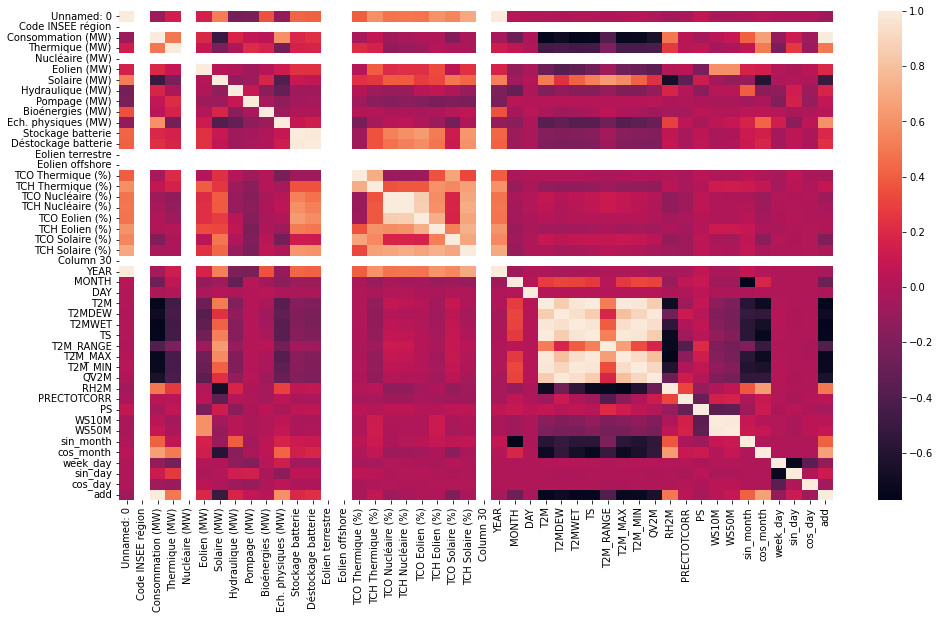

In [86]:
sns.heatmap(df_energy_weather.corr())

In [87]:
df_energy_weather[['T2M', 'Consommation (MW)']].corr()

,T2M,Consommation (MW)
T2M,1.000000,-0.749031
Consommation (MW),-0.749031,1.000000


<AxesSubplot:>

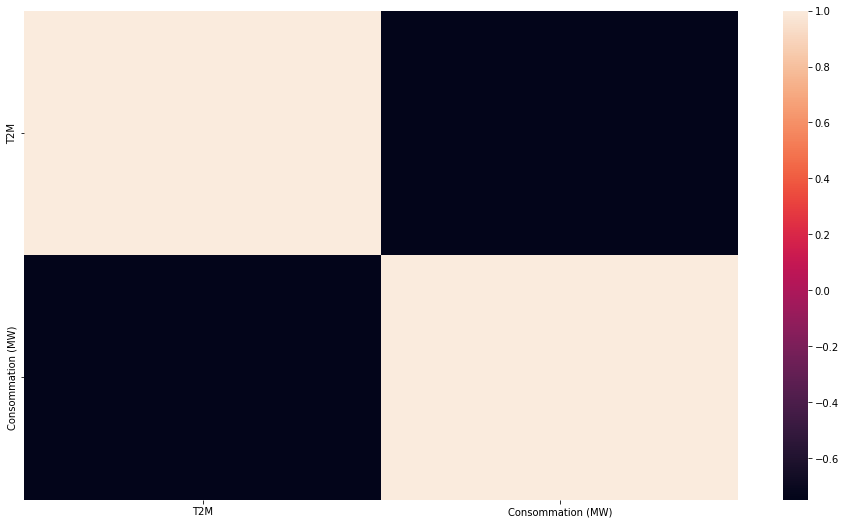

In [88]:
sns.heatmap(df_energy_weather[['T2M', 'Consommation (MW)']].corr())

<AxesSubplot:>

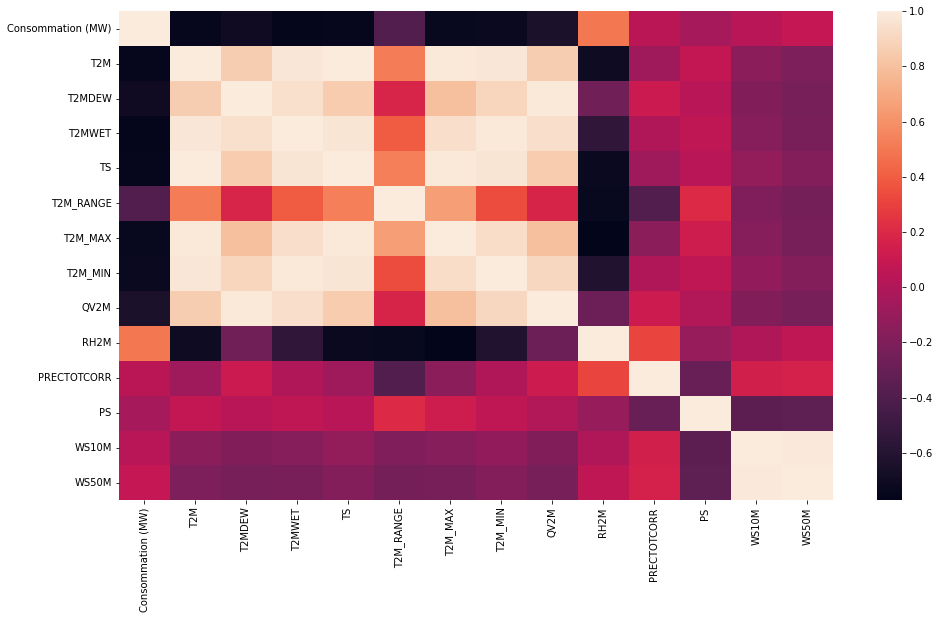

In [89]:
sns.heatmap(df_energy_weather[['Consommation (MW)', 'T2M', 'T2MDEW',
       'T2MWET', 'TS', 'T2M_RANGE', 'T2M_MAX', 'T2M_MIN', 'QV2M', 'RH2M',
       'PRECTOTCORR', 'PS', 'WS10M', 'WS50M']].corr())

In [90]:
df_energy_weather[['Consommation (MW)', 'T2M', 'T2MDEW',
       'T2MWET', 'TS', 'T2M_RANGE', 'T2M_MAX', 'T2M_MIN', 'QV2M', 'RH2M',
       'PRECTOTCORR', 'PS', 'WS10M', 'WS50M']].corr()

,Consommation (MW),T2M,T2MDEW,T2MWET,TS,T2M_RANGE,T2M_MAX,T2M_MIN,QV2M,RH2M,PRECTOTCORR,PS,WS10M,WS50M
Consommation (MW),1.000000,-0.749031,-0.697881,-0.753928,-0.746416,-0.396805,-0.735148,-0.725828,-0.647679,0.496240,0.038517,-0.043992,0.034217,0.083586
T2M,-0.749031,1.000000,0.861183,0.976810,0.996378,0.516551,0.983530,0.977809,0.861382,-0.708916,-0.072658,0.074981,-0.146309,-0.207918
T2MDEW,-0.697881,0.861183,1.000000,0.950042,0.847949,0.176963,0.792971,0.900803,0.984816,-0.259605,0.112493,0.034759,-0.197655,-0.234775
T2MWET,-0.753928,0.976810,0.950042,1.000000,0.969012,0.391745,0.937965,0.979869,0.943763,-0.544667,0.002786,0.060674,-0.173110,-0.226578
TS,-0.746416,0.996378,0.847949,0.969012,1.000000,0.525079,0.980656,0.970237,0.850834,-0.718610,-0.074633,0.035631,-0.116964,-0.180179
T2M_RANGE,-0.396805,0.516551,0.176963,0.391745,0.525079,1.000000,0.652247,0.339799,0.175922,-0.734163,-0.397232,0.200325,-0.199136,-0.243992
T2M_MAX,-0.735148,0.983530,0.792971,0.937965,0.980656,0.652247,1.000000,0.934536,0.794446,-0.772468,-0.154567,0.123027,-0.174865,-0.238057
T2M_MIN,-0.725828,0.977809,0.900803,0.979869,0.970237,0.339799,0.934536,1.000000,0.903122,-0.613764,-0.005268,0.058607,-0.123478,-0.180823
QV2M,-0.647679,0.861382,0.984816,0.943763,0.850834,0.175922,0.794446,0.903122,1.000000,-0.284706,0.117649,0.006348,-0.195768,-0.235130
RH2M,0.496240,-0.708916,-0.259605,-0.544667,-0.718610,-0.734163,-0.772468,-0.613764,-0.284706,1.000000,0.311975,-0.107119,-0.003671,0.064096


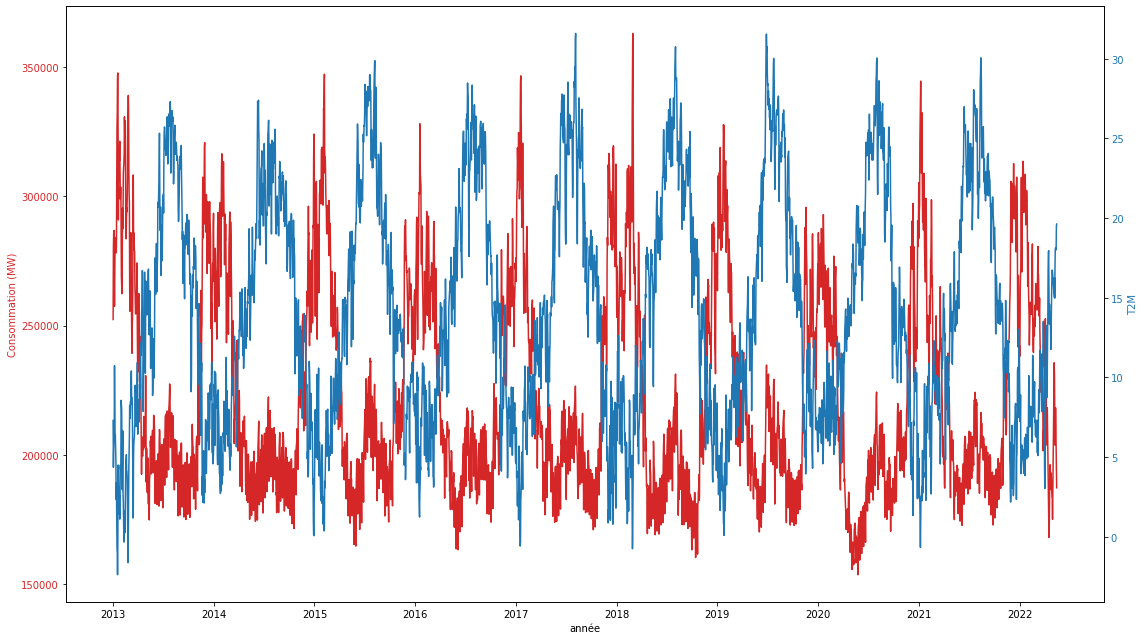

In [91]:
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"]=[16,9]

# Create some mock data
t = np.arange(2018, 2020)
data1 = df_energy_weather['Consommation (MW)']
data2 = df_energy_weather['T2M']

fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('année')
ax1.set_ylabel('Consommation (MW)', color=color)
ax1.plot( data1, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('T2M', color=color)  # we already handled the x-label with ax1
ax2.plot( data2, color=color)
ax2.tick_params(axis='y', labelcolor=color)
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

In [92]:
df_energy_weather['Consommation (MW)'].shape

(3417,)

In [93]:
df_energy_weather['T2M'].shape

(3417,)

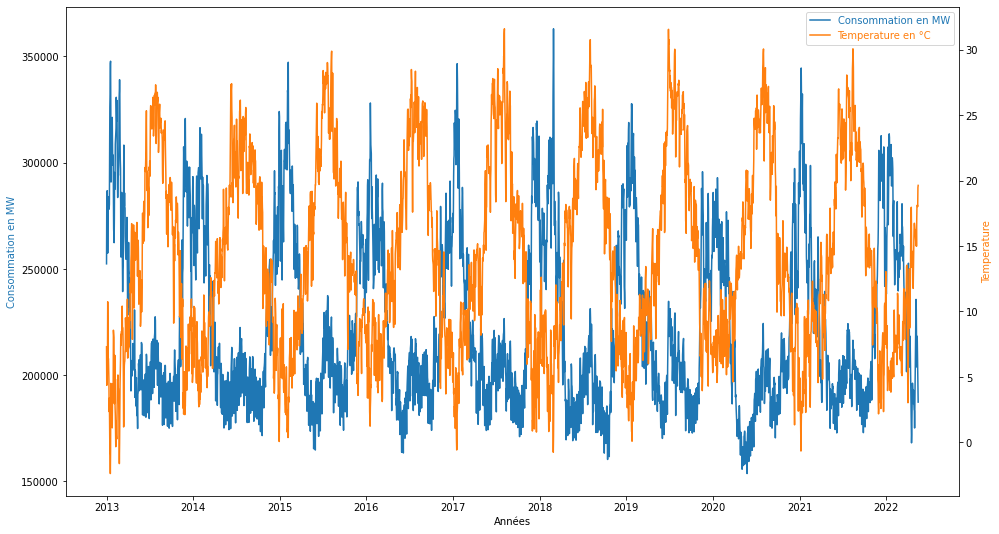

In [94]:
from mpl_toolkits.axes_grid1 import host_subplot
import matplotlib.pyplot as plt

#plt.figure(figsize=(18,6))
t = np.arange(2018, 2020)

host = host_subplot(111)

par = host.twinx()

host.set_xlabel("Années")
#host.set_xlim(2018, 2020)
#host.set_xlim(2018, 2020)
#ax.set_xticks(df_energy_weather['Date'])
host.set_ylabel("Consommation en MW")
par.set_ylabel("Temperature")

p1, = host.plot(df_energy_weather['Consommation (MW)'], label="Consommation en MW")
p2, = par.plot(df_energy_weather['T2M'], label="Temperature en °C")

leg = plt.legend()

host.yaxis.get_label().set_color(p1.get_color())
leg.texts[0].set_color(p1.get_color())

par.yaxis.get_label().set_color(p2.get_color())
leg.texts[1].set_color(p2.get_color())

plt.show()

In [95]:
np.unique(df_energy_weather['Consommation (MW)']) 

array([153691., 155728., 157455., ..., 349322., 350492., 362960.])

In [96]:
np.unique(df_energy_weather['T2M'])

array([-2.38, -1.62, -1.01, ..., 31.52, 31.55, 31.59])

In [97]:
ener = np.array(df_energy_weather['Consommation (MW)'])

In [98]:
ener.size

3417

In [99]:
temp = np.array(df_energy_weather['T2M'])

In [100]:
temp.size

3417

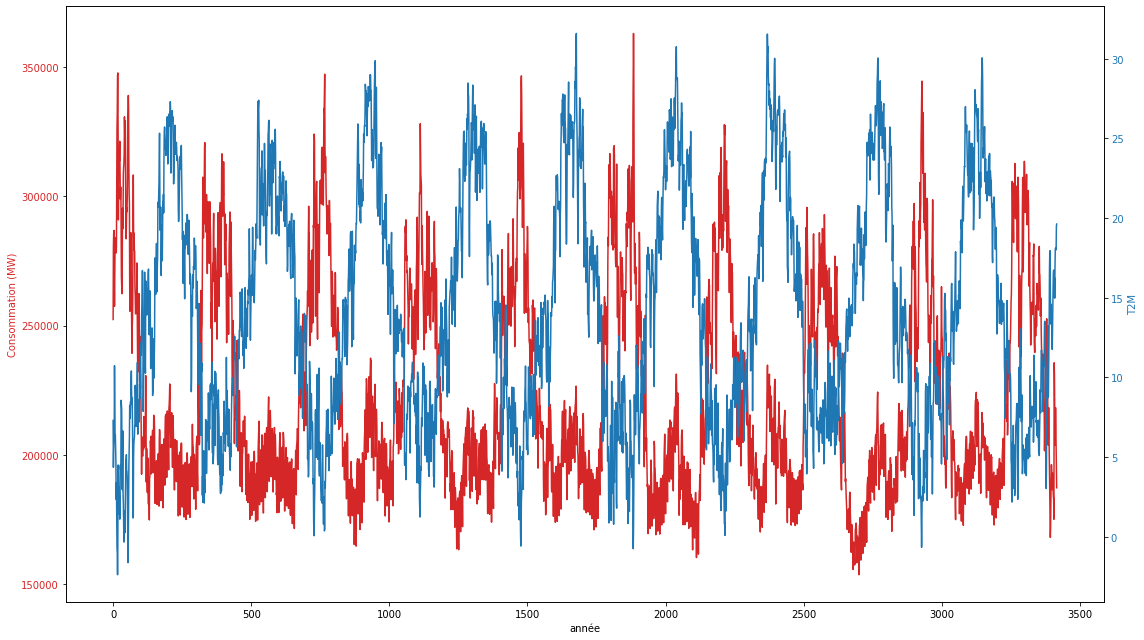

In [101]:
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"]=[16,9]

# Create some mock data
#t = df_energy_weather['Date']
data1 = ener
data2 = temp

fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('année')
ax1.set_ylabel('Consommation (MW)', color=color)
ax1.plot( data1, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('T2M', color=color)  # we already handled the x-label with ax1
ax2.plot(data2, color=color)
ax2.tick_params(axis='y', labelcolor=color)
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

# GRAPHIQUES POUR PRESENTATION

Consommation energie de 2013 à 2022 en mégawatt

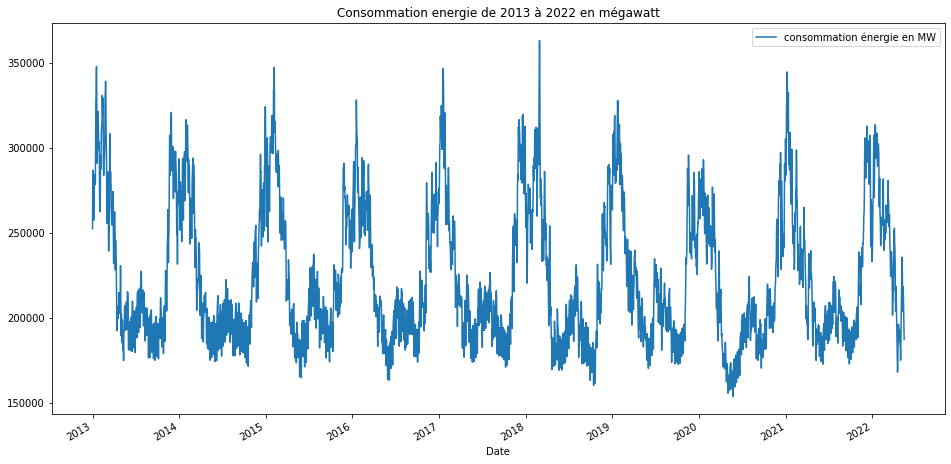

In [102]:
df_energy_weather['Consommation (MW)'].plot(figsize=(16,8), label='consommation énergie en MW', title='Consommation energie de 2013 à 2022 en mégawatt')
plt.legend()
plt.show()

Consommation energie par mois sur une année de référence en mégawatt

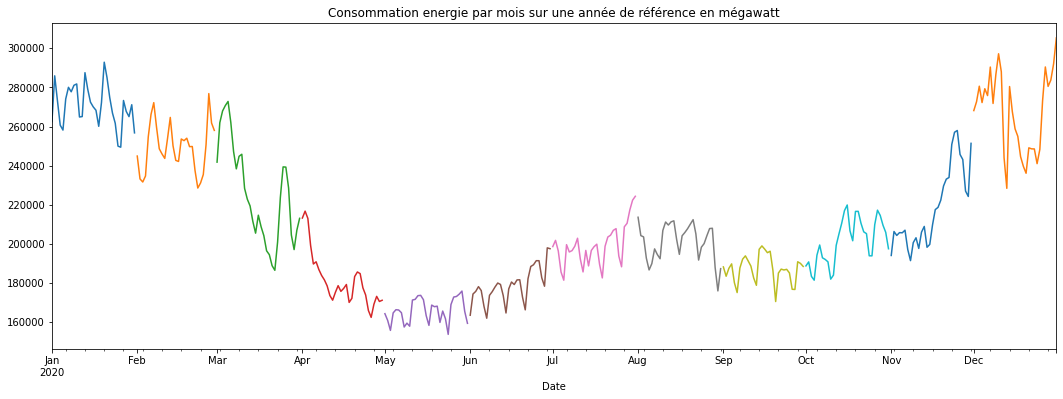

In [103]:
df_energy_weather['Consommation (MW)']['2020'].resample("M").plot(figsize=(18,6))
plt.title('Consommation energie par mois sur une année de référence en mégawatt')
#df_energy_weather.loc['2020-01' : '2020-02','Consommation (MW)'].resample("M").plot(figsize=(16,8))    #PLAGE DE REFERENCE
#df_energy_weather['Consommation (MW)']['2020'].hist(figsize=(18,6))                                    #HISTOGRAMME
plt.show()

Part de la production dans la consommation d'énergie

In [104]:
échange_physique = (df_energy_weather['Ech. physiques (MW)'] / df_energy_weather['Consommation (MW)'])*100
Thermique = (df_energy_weather['Thermique (MW)'] / df_energy_weather['Consommation (MW)'])*100
Hydraulique = (df_energy_weather['Hydraulique (MW)'] / df_energy_weather['Consommation (MW)'])*100
Eolien = (df_energy_weather['Eolien (MW)'] / df_energy_weather['Consommation (MW)'])*100
Solaire = (df_energy_weather['Solaire (MW)'] / df_energy_weather['Consommation (MW)'])*100
Bioénergies = (df_energy_weather['Bioénergies (MW)'] / df_energy_weather['Consommation (MW)'])*100
Nucléaire = (df_energy_weather['Nucléaire (MW)'] / df_energy_weather['Consommation (MW)'])*100
Pompage = (df_energy_weather['Pompage (MW)'] / df_energy_weather['Consommation (MW)'])*100

In [105]:
Thermique['2021'].sum()            # 4595
échange_physique['2021'].sum()     # 21017
Hydraulique['2021'].sum()          # 8049
Solaire['2021'].sum()              # 2029
Bioénergies['2021'].sum()          # 702

702.3742836960218

In [106]:
import plotly.express as px
RPA = np.array([4595,21017,8049,2029,702])
df = px.data.tips()
fig = px.pie(df,values=RPA,names=('Thermique (MW)','Ech. physiques (MW)','Hydraulique (MW)', 'Solaire (MW)','Bioénergies (MW)'),title='Répartition de la production énergétique en 2021')
fig.show()
#peut-etre choisir un an

In [107]:
df_energy_weather.columns

Index(['Unnamed: 0', 'Code INSEE région', 'Consommation (MW)',
       'Thermique (MW)', 'Nucléaire (MW)', 'Eolien (MW)', 'Solaire (MW)',
       'Hydraulique (MW)', 'Pompage (MW)', 'Bioénergies (MW)',
       'Ech. physiques (MW)', 'Stockage batterie', 'Déstockage batterie',
       'Eolien terrestre', 'Eolien offshore', 'TCO Thermique (%)',
       'TCH Thermique (%)', 'TCO Nucléaire (%)', 'TCH Nucléaire (%)',
       'TCO Eolien (%)', 'TCH Eolien (%)', 'TCO Solaire (%)',
       'TCH Solaire (%)', 'Column 30', 'YEAR', 'MONTH', 'DAY', 'T2M', 'T2MDEW',
       'T2MWET', 'TS', 'T2M_RANGE', 'T2M_MAX', 'T2M_MIN', 'QV2M', 'RH2M',
       'PRECTOTCORR', 'PS', 'WS10M', 'WS50M', 'sin_month', 'cos_month',
       'week_day', 'sin_day', 'cos_day', 'add'],
      dtype='object')

In [108]:
import plotly.express as px
x= df_energy_weather[['Consommation (MW)']]
fig = px.line(x,title='Evolution de la consommation énergétique de 2013 à 2022')
fig.show()

In [170]:
#h= df_energy_weather[['Hydraulique (MW)']].loc["2016"].resample('W').mean()                # de fev à juin 2018
h= df_energy_weather[['Hydraulique (MW)']]["2017-10":"2019-10"].resample('M').mean()                  # de fev. à juin 2020 - réduction production pendant 1er confinement
#h= df_energy_weather[['Hydraulique (MW)']]                                      # de 2013 à 2022
fig = px.line(h, title='Production hydraulique par rapport à la consommation totale')
fig.show()

#prendre deux ans
#voir précipitation

In [150]:
H= df_energy_weather[['Eolien (MW)', 'WS10M', 'WS50M']]['2020':'2022'].resample('M').mean()
fig = px.line(H, log_y=True)
fig.show()
#possibilité de mettre le vent???

In [129]:
import plotly.express as px
e = df_energy_weather[['Eolien (MW)', 'WS10M']].resample('M').mean()
fig = px.histogram(e)
fig.show()

In [111]:
df_energy_weather[['Eolien (MW)']].max()

Eolien (MW)    3806.0
dtype: float64

Evolution production thermique par rapport à la production d'énergie

In [112]:

T=df_energy_weather[['Consommation (MW)','Thermique (MW)']]['2018':'2021'].resample('M').mean()
fig = px.line(T,title='Evolution de la production thermique par rapport à la consommation totale de 2018 à 2021')
fig.show()
#montrer la consommation globale.
#on soutien notre conso gràce à la production du thermique

In [113]:
df_energy_weather[['Consommation (MW)','Thermique (MW)']].corr()

,Consommation (MW),Thermique (MW)
Consommation (MW),1.000000,0.501084
Thermique (MW),0.501084,1.000000


Production "verte"

In [114]:
production_verte = Eolien + Bioénergies + Solaire
production_verte.sum()

21663.603904067983

In [115]:
PV=production_verte.resample('M').mean()
fig = px.line(PV)
fig.show()

In [116]:
PVD=df_energy_weather[['Solaire (MW)','Bioénergies (MW)','Eolien (MW)']].resample('3M').mean()

fig = px.line(PVD,title='Comparaison des productions "éco-responsables" depuis 2013')
fig.show()


In [117]:
fig = px.line(df_energy_weather[['Consommation (MW)','Ech. physiques (MW)']]['2018':'2020'].resample('M').mean(),title='Evolution des échanges physiques par rapport à nos besoins en énergie entre 2018 et 2020')
fig.show()
# avec conso

In [118]:
ech_th=df_energy_weather[['Ech. physiques (MW)','Thermique (MW)','Hydraulique (MW)' ]]['2020':'2022'].resample('M').mean()

fig = px.line(ech_th,title='Evolution de la production thermique et hydraulique par rapport aux échanges physiques entre 2020 et 2022')
fig.show()
#tester 2020 21

In [119]:
#Plotly FigureWidget Overview in Python
#https://plotly.com/python/figurewidget/

In [120]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Create figure with secondary y-axis
fig = make_subplots(specs=[[{"secondary_y": True}]])

x = df_energy_weather[['Date']]
# Add traces
fig.add_trace(
    go.Scatter(x,y=df_energy_weather[['Eolien (MW)']], name="Production éolien"),
    secondary_y=False,
)

fig.add_trace(
    go.Scatter(x,y=df_energy_weather[['WS10M']], name="Force du vent"),
    secondary_y=True,
)

# Add figure title
fig.update_layout(
    title_text="Double Y Axis Example"
)

# Set x-axis title
fig.update_xaxes(title_text="xaxis title")

# Set y-axes titles
fig.update_yaxes(title_text="<b>primary</b> yaxis title", secondary_y=False)
fig.update_yaxes(title_text="<b>secondary</b> yaxis title", secondary_y=True)

fig.show()

KeyError: "None of [Index(['Date'], dtype='object')] are in the [columns]"

In [121]:
#E= df_energy_weather[['Eolien (MW)', 'WS10M', 'WS50M']].resample('M').mean()
#fig = px.line(E)
#fig.show()
#possibilité de mettre le vent???

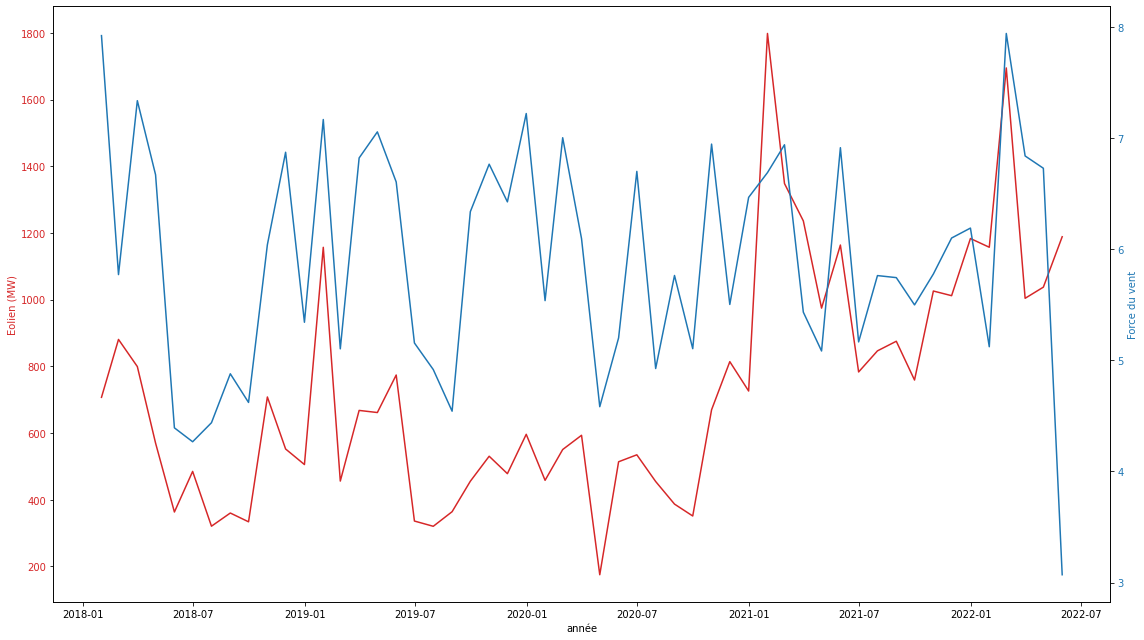

In [162]:
# Comparaison de la production eolien par rapport au vent
plt.rcParams["figure.figsize"]=[16,9]

# Create some mock data
#t = df_energy_weather['Date']
data1 = df_energy_weather[['Eolien (MW)']]['2018':'2022'].resample('M').mean()
data2 = df_energy_weather[['WS50M']]['2018':'2022'].resample('M').mean()
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('année')
ax1.set_ylabel('Eolien (MW)', color=color)
ax1.plot( data1, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Force du vent', color=color)  # we already handled the x-label with ax1
ax2.plot(data2, color=color)
ax2.tick_params(axis='y', labelcolor=color)
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

In [123]:
df_energy_weather[['Eolien (MW)', 'WS10M', 'WS50M']].corr()

,Eolien (MW),WS10M,WS50M
Eolien (MW),1.000000,0.593884,0.595957
WS10M,0.593884,1.000000,0.991545
WS50M,0.595957,0.991545,1.000000


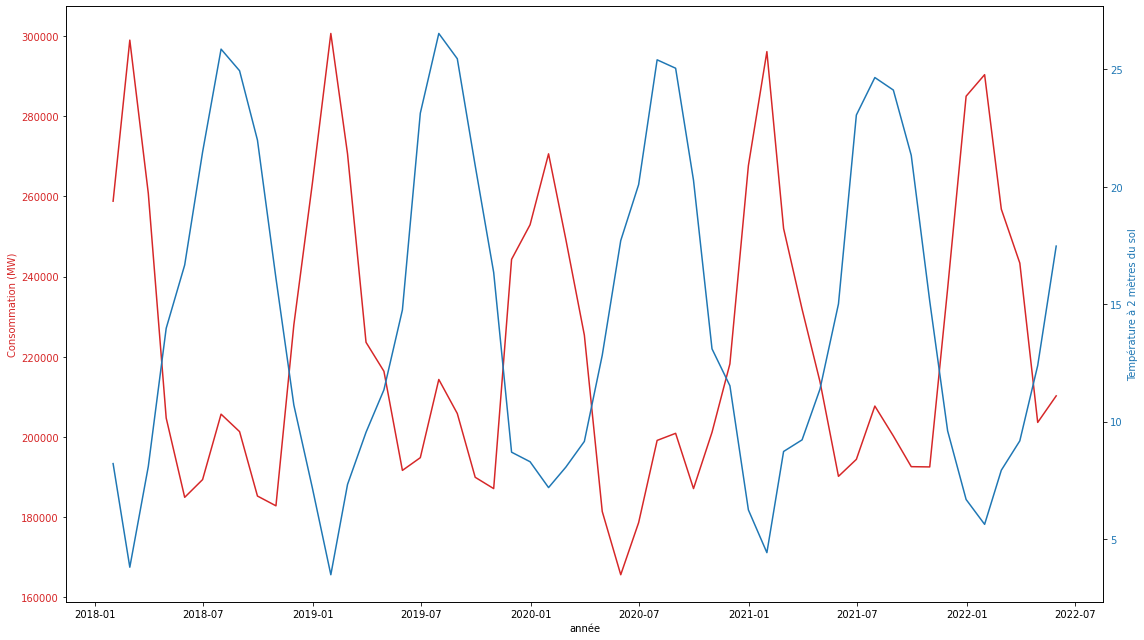

In [164]:
#production par rapport à température
plt.rcParams["figure.figsize"]=[16,9]

# Create some mock data
#t = df_energy_weather['Date']
data1 = df_energy_weather[['Consommation (MW)']]['2018':'2022'].resample('M').mean()
data2 = df_energy_weather[['T2M']]['2018':'2022'].resample('M').mean()
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('année')
ax1.set_ylabel('Consommation (MW)', color=color)
ax1.plot( data1, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Température à 2 mètres du sol', color=color)  # we already handled the x-label with ax1
ax2.plot(data2, color=color)
ax2.tick_params(axis='y', labelcolor=color)
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

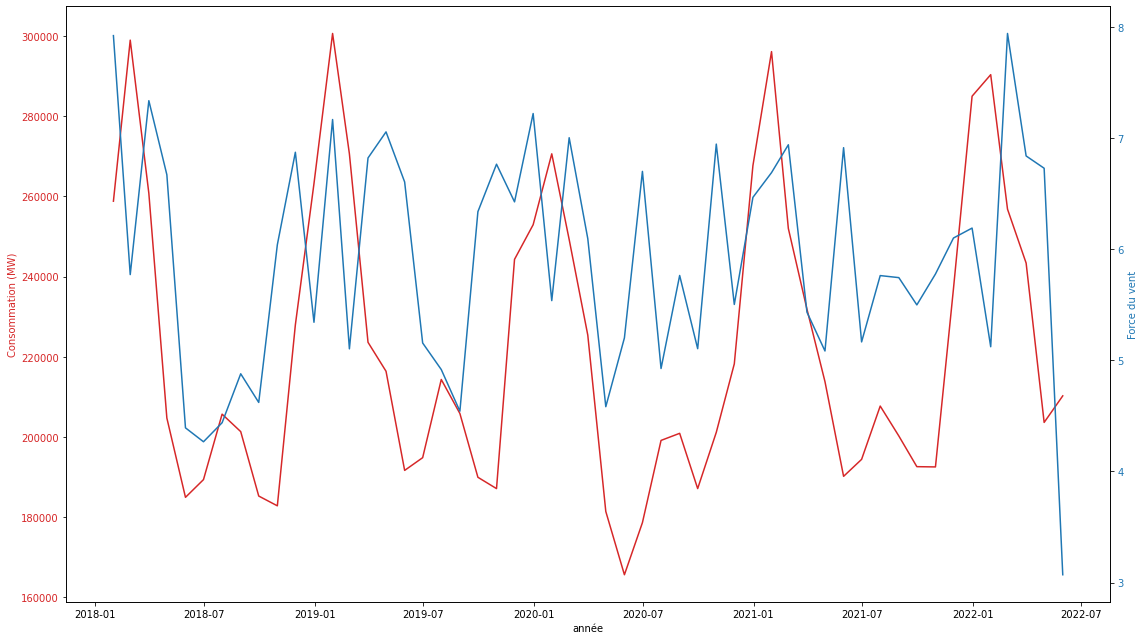

In [167]:
# Consommation par rapport au vent
plt.rcParams["figure.figsize"]=[16,9]

# Create some mock data
#t = df_energy_weather['Date']
data1 = df_energy_weather[['Consommation (MW)']]['2018':'2022'].resample('M').mean()
data2 = df_energy_weather[['WS50M']]['2018':'2022'].resample('M').mean()
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('année')
ax1.set_ylabel('Consommation (MW)', color=color)
ax1.plot( data1, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Force du vent', color=color)  # we already handled the x-label with ax1
ax2.plot(data2, color=color)
ax2.tick_params(axis='y', labelcolor=color)
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

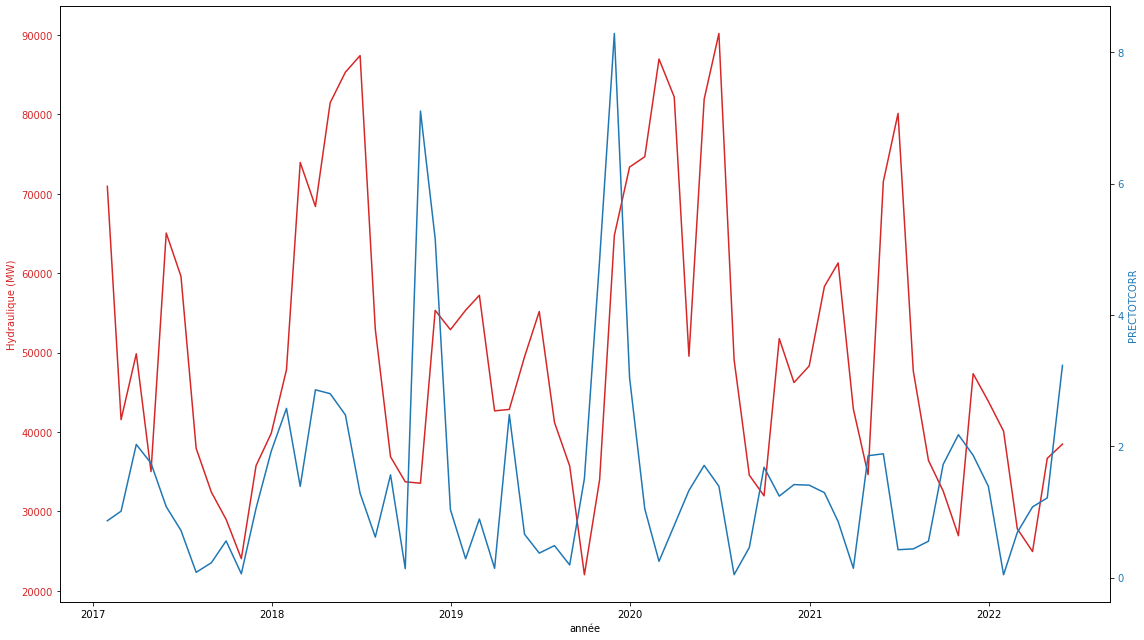

In [181]:
#, 'PRECTOTCORR'
# Consommation par rapport au vent
plt.rcParams["figure.figsize"]=[16,9]

# Create some mock data
#t = df_energy_weather['Date']
data1 = df_energy_weather[['Hydraulique (MW)']]['2017':'2022'].resample('M').mean()
data2 = df_energy_weather[['PRECTOTCORR']]['2017':'2022'].resample('M').mean()
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('année')
ax1.set_ylabel('Hydraulique (MW)', color=color)
ax1.plot( data1, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('PRECTOTCORR', color=color)  # we already handled the x-label with ax1
ax2.plot(data2, color=color)
ax2.tick_params(axis='y', labelcolor=color)
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()



In [183]:
df_energy_weather.columns

Index(['Unnamed: 0', 'Code INSEE région', 'Consommation (MW)',
       'Thermique (MW)', 'Nucléaire (MW)', 'Eolien (MW)', 'Solaire (MW)',
       'Hydraulique (MW)', 'Pompage (MW)', 'Bioénergies (MW)',
       'Ech. physiques (MW)', 'Stockage batterie', 'Déstockage batterie',
       'Eolien terrestre', 'Eolien offshore', 'TCO Thermique (%)',
       'TCH Thermique (%)', 'TCO Nucléaire (%)', 'TCH Nucléaire (%)',
       'TCO Eolien (%)', 'TCH Eolien (%)', 'TCO Solaire (%)',
       'TCH Solaire (%)', 'Column 30', 'YEAR', 'MONTH', 'DAY', 'T2M', 'T2MDEW',
       'T2MWET', 'TS', 'T2M_RANGE', 'T2M_MAX', 'T2M_MIN', 'QV2M', 'RH2M',
       'PRECTOTCORR', 'PS', 'WS10M', 'WS50M', 'sin_month', 'cos_month',
       'week_day', 'sin_day', 'cos_day', 'add'],
      dtype='object')

<AxesSubplot:xlabel='Date'>

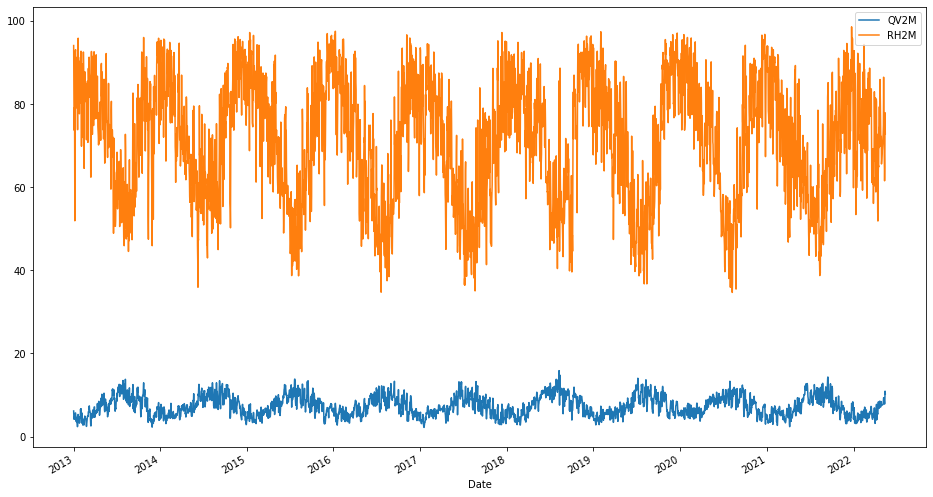

In [186]:
df_energy_weather[['QV2M', 'RH2M']].plot()